# Projet analyse de donnee Disney
# groupe 5
# ZAKI EL IDRISSI Abdallah
# ZAOUIA Mouad
# GERMAT Youness

# importer les bibliotheques


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Charger le dataset desney.csv

In [3]:
disney_df = pd.read_csv('disney (1).csv')

# Question 1 : Top 5 des meilleures catégories

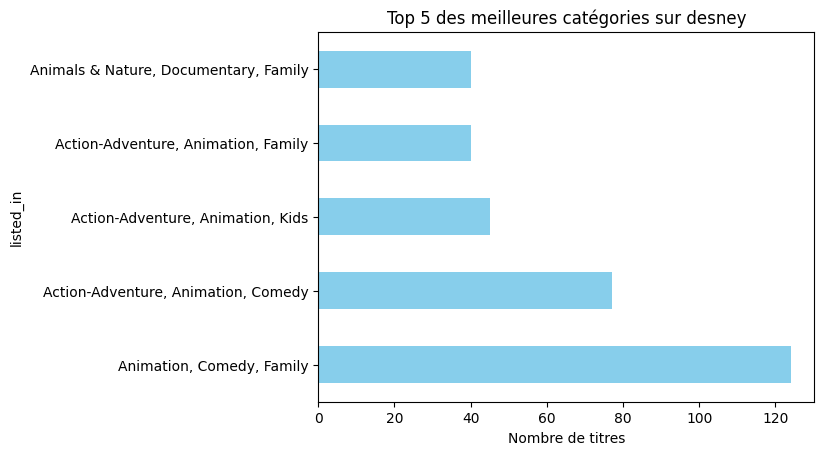

In [ ]:
QUESTION1 = disney_df['listed_in'].value_counts().head(5)
QUESTION1.plot(kind='barh', color='skyblue')
plt.xlabel('Nombre de titres')
plt.title('Top 5 des meilleures catégories sur disney')
plt.show()

# Question 2 : Top 5 des réalisateurs

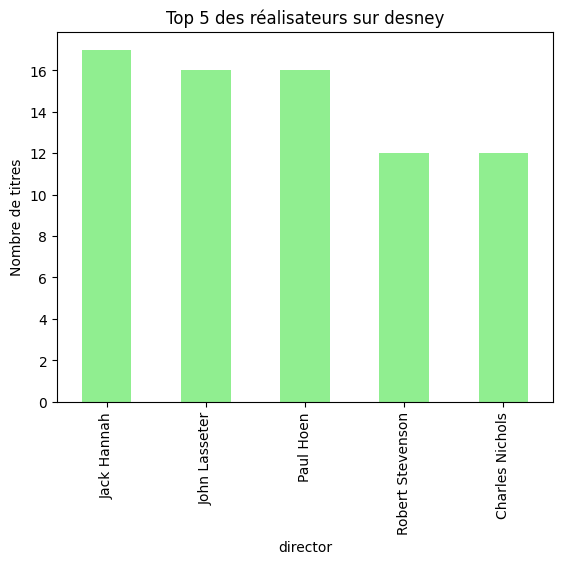

In [5]:
question2 = disney_df['director'].value_counts().head(5)
question2.plot(kind='bar', color='lightgreen')
plt.ylabel('Nombre de titres')
plt.title('Top 5 des réalisateurs sur disney')
plt.show()

# Question 3 : Les dix meilleurs acteurs

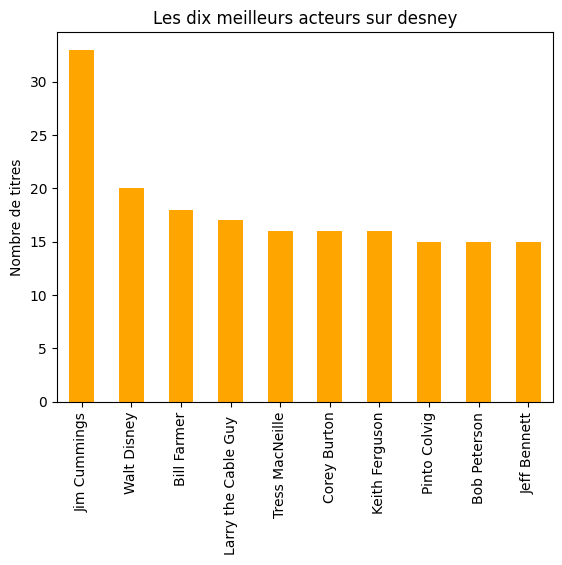

In [6]:
question3 = disney_df['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
question3.plot(kind='bar', color='orange')
plt.ylabel('Nombre de titres')
plt.title('Les dix meilleurs acteurs sur desney')
plt.show()

# Question 4 : Les cinq meilleures séries télévisées avec le plus grand nombre de saisons

# Filtrez les données pour ne conserver que les séries télévisées (type "TV Show")


In [7]:
question4 = disney_df[disney_df['type'] == 'TV Show']

# Triez les séries télévisées par le nombre de saisons en utilisant la colonne "duration"


In [8]:
top_series = question4.sort_values(by='duration', ascending=False).head(5)


# Créez un graphique à barres pour visualiser les cinq meilleures séries télévisées


C:\Users\ABDO EL IDRISSI\AppData\Local\Temp\ipykernel_19068\3959569412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='duration', data=top_series, palette='muted')


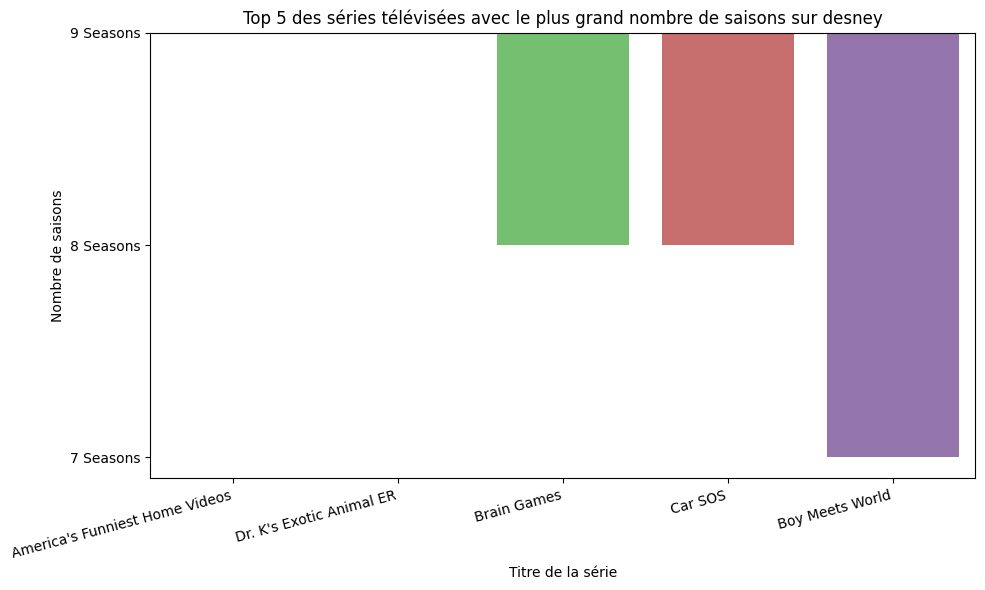

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='duration', data=top_series, palette='muted')
plt.xlabel('Titre de la série')
plt.ylabel('Nombre de saisons')
plt.title('Top 5 des séries télévisées avec le plus grand nombre de saisons sur desney')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

# Question 5 : Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles
# Afficher les premières lignes pour comprendre la structure des données

In [10]:
disney_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


# Créer un objet TfidfVectorizer pour extraire les caractéristiques textuelles


In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(disney_df['description'])

# Calculer la similarité cosinus entre toutes les paires de descriptions

In [12]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Définir le seuil de similarité

In [13]:
similarity_threshold = 0.7

# Trouver les indices des paires de descriptions similaires
# Afficher les paires de descriptions similaires

In [14]:
similar_indices = [(i, j) for i in range(len(cosine_similarities)) for j in range(i+1, len(cosine_similarities[i])) if cosine_similarities[i][j] >= similarity_threshold]
print("Contenus similaires trouvés :")
for idx1, idx2 in similar_indices:
    print(f"Titre 1 : {disney_df.iloc[idx1]['title']}")
    print(f"Description 1 : {disney_df.iloc[idx1]['description']}")
    print(f"Titre 2 : {disney_df.iloc[idx2]['title']}")
    print(f"Description 2 : {disney_df.iloc[idx2]['description']}")
    print("\n")

Contenus similaires trouvés :
Titre 1 : Coop & Cami Ask The World
Description 1 : Cooper and Cami Wrather co-host "Would You Wrather."
Titre 2 : Coop & Cami Ask The World (Shorts)
Description 2 : Cooper and Cami Wrather co-host "Would You Wrather."


Titre 1 : Fairy Tale Weddings
Description 1 : A behind-the-scenes look at Disney's magical weddings.
Titre 2 : Disney's Fairy Tale Weddings
Description 2 : A look at the magical weddings at Disney Destinations.


Titre 1 : High School Musical: The Musical: The Series: The Sing-Along
Description 1 : Sing along as the East High Wildcats put on a production of High School Musical: The Musical!
Titre 2 : High School Musical: The Musical: The Series
Description 2 : For the first time ever, East High Wildcats put on a production of High School Musical: The Musical!


Titre 1 : Coco
Description 1 : Miguel journeys to the magical land of his ancestors.
Titre 2 : Coco (in Spanish)
Description 2 : Miguel journeys to the magical land of his ancestors

# Question 6 : disney se concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?


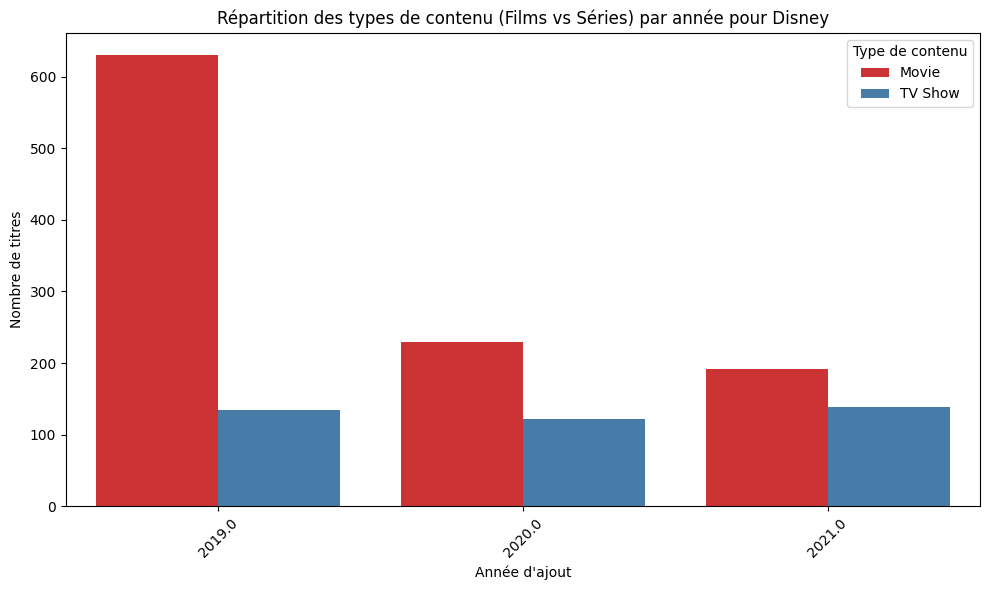

In [15]:
disney_df = pd.read_csv('disney (1).csv')

all_df = pd.concat([ disney_df])

all_df['date_added'] = pd.to_datetime(all_df['date_added'])

all_df['year_added'] = all_df['date_added'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(x='year_added', hue='type', data=all_df, palette='Set1')
plt.xlabel('Année d\'ajout')
plt.ylabel('Nombre de titres')
plt.title('Répartition des types de contenu (Films vs Séries) par année pour Disney')
plt.legend(title='Type de contenu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()